In [48]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [12, 9]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Announcements

  - Quiz 3 in recitation this week. 
    - Curves, tangents
    - Motion
    - Arc length
  - Homework 4 posted, due 10/01
  - CA Help Room (New Rooms!) open 
    - Thur 7–9pm - ET 253
    - Sun 3–5pm - Mudd 337
    - Mon 7–9pm - ET 253
    

# One-minute Review

A **space curve** is a vector-function of a scalar $$\vec r(t) = x(t)\vec i + y(t) \vec j + z(t) \vec k.$$ 

When interpreted as position as a function of time, we say $$\vec a(t) = \vec v'(t) = \vec r''(t).$$

In [14]:
r1 = lambda t: np.array([t,t**2,t**3])
r2 = lambda t: np.array([cos(2*pi*t),sin(2*pi*t),t])
r3 = lambda t: np.array([cos(8*pi*t),sin(3*pi*t),sin(7*pi*t)])

@interact
def _(t=(-1,1,.05),r={"twist":r1, "helix": r2, "wacky": r3},angle=(-90,120,6),vangle=(0,90,6)):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111,projection='3d')
    s = np.linspace(-1,1,300)
    ax.view_init(vangle, angle)
    ax.set_autoscale_on(True)
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    X,Y,Z = np.column_stack([r(x) for x in s])
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'k')
    ax.plot([0,0],[-1,1],[0,0],'k')
    ax.plot([0,0],[0,0],[-1,1],'k')
    ax.plot(X,Y,Z,alpha=1,lw=3);
    ax.quiver(0,0,0,r(t)[0],r(t)[1],r(t)[2])
    v,w,x =[r(t),(r(t+.01)-r(t-.01))/.02,(r(t+.01)-2*r(t)+r(t-.01))/(.01**2)] # position, first, and second derivative
    T = w / norm(w) # unit tangent vector
    n = x - np.dot(x,T)*T
    n = n/norm(n) # unit normal vector
    k = norm(np.cross(w,x))/(norm(w)**3) # curvature 
    s = np.linspace(0,2*pi,200)
    X,Y,Z = np.column_stack([v + n/k + cos(x)*n/k +sin(x)*T/k   for x in s]) # osculating circle
    ax.plot(X,Y,Z,color='y')
    ax.quiver(v[0],v[1],v[2],T[0],T[1],T[2],color='r')
    ax.quiver(v[0],v[1],v[2],n[0],n[1],n[2],color='g')

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, min=-1.0, step=0.05), Dropdown(descript…

# Lecture 07

  - Objectives

    - Sketch contour plot of a function of 2 variables
    - Relate level sets to a graph
    - Explore limits and continuity of $f(x,y)$.
    - Define partial derivatives
  
  - Resources
    - Content
      - Stewart: §14.1–2
      - New Strang: [§4.1](https://cnx.org/contents/oxzXkyFi@5.30:t-PZBc8c@6/4-1-Functions-of-Several-Variables) [§4.2](https://cnx.org/contents/oxzXkyFi@5.30:2YObsFkq@7/4-2-Limits-and-Continuity)
      - [Slides](https://hub.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-f19&urlpath=tree%2Fmvc-f19%2Fslides%2Fmvc-L07.ipynb) via JupyterHub
    - Visualization
      - [CalcPlot3D](https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/)
    - Practice
      - Mooculus: [Functions of Several Variables](https://ximera.osu.edu/mooculus/calculus3/functionsOfSeveralVariables/digInFunctionsOfSeveralVariables) [Level Sets](https://ximera.osu.edu/mooculus/calculus3/functionsOfSeveralVariables/digInLevelSets) [Continuity](https://ximera.osu.edu/mooculus/calculus3/continuityOfFunctionsOfSeveralVariables/digInContinuity)
    - Extras
      - CalcBLUE: [Multivariate Functions](https://www.youtube.com/watch?v=owMT-d4RRpw&index=4&list=PL8erL0pXF3JYm7VaTdKDaWc8Q3FuP8Sa7)

# Functions of several variables

We turn our attention to **scalar fields** or "functions of several variables $$f:\RR^n \to \RR.$$

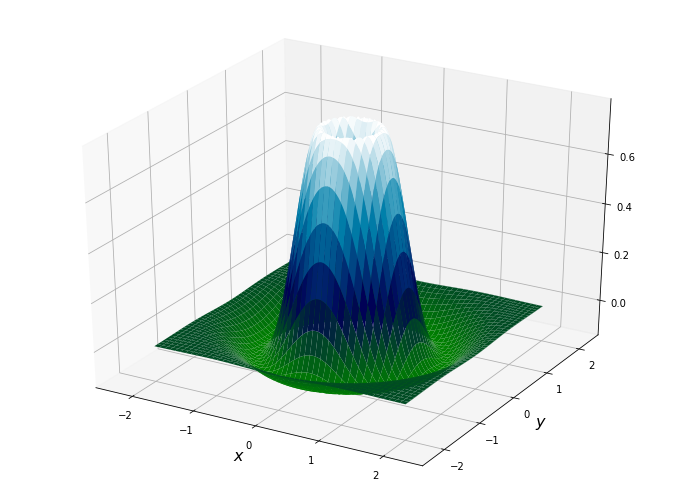

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x = y = np.linspace(-1,1,801)
X,Y = np.meshgrid(x,y)
X = 2*X
Y = 2*Y
Z = exp(-X**2-Y**2)*sin(3*np.sqrt(X**2+Y**2))
ax.plot_surface(X,Y,Z,alpha=1,cmap='ocean');
Z =1/2 + 0*X
# ax.plot_surface(X,Y,Z,alpha=.6,color='purple')
for c in 'xy':
        getattr(ax,f"set_{c}lim")([-2.5,2.5]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
ax.set_zlim=([exp(-1),8])
# ax.contour(X,Y,Z)

## Formulas

Many—but not all or even most—functions can be written down with explicit formulas.

#### Examples

\begin{align*}
f(x,y) &= \frac{x \sin 2y + y \sin 2x }{2} \\
g(x,y) &= x^2 + 2xy+y^2 \\
h(x,y) &= e^{-x^2 -y^2}
\end{align*}

The **graph** is the surface given by $z=f(x,y)$. 

A **level set** is the set of all inputs $(x,y)$ that give a specific output $k$. When graphed on the same axes, several level sets make a **contour plot**. 

In [50]:
f = lambda x,y: x*sin(2*y)/2 + y* sin(2*x)/2
g = lambda x,y: (x+y)**2
h = lambda x,y: exp(-x**2-y**2)



@interact
def _(func={"f(x,y)":f,"g(x,y)":g,"h(x,y)":h},angle=(-90,120,6),vangle=(0,90,6)):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(121,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x = y = np.linspace(-1,1,401)
    X,Y = np.meshgrid(x,y)
    X = 2*X
    Y = 2*Y
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=1,cmap='ocean');
    ax2 = fig.add_subplot(122)
    ax2.contour(X,Y,Z)

interactive(children=(Dropdown(description='func', options={'f(x,y)': <function <lambda> at 0x113552840>, 'g(x…

## Exercises

For each function below, 
  - find the domain,
  - make a contour plot with appropriate levels, and
  - if possible, sketch a graph.

&nbsp;
  1. $\displaystyle xy$
  1. $\displaystyle x \sin y$
  1. $\displaystyle \sqrt{4-x^2-y^2}$
  1. $\displaystyle \ln (x^2 + y^2)$
  1. $\displaystyle 2^{x-y}$

In [51]:
f = lambda x,y: x*y
g = lambda x,y: x*sin(y)
h = lambda x,y: sqrt(4-x**2-y**2)
k = lambda x,y: log(x**2+y**2)
l = lambda x,y: exp((x-y)*log(2))


@interact
def _(func={"1":f,"2":g,"3":h,"4":k,"5":l},angle=(-90,120,6),vangle=(0,90,6)):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(121,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x = y = np.linspace(-1,1,400)
    X,Y = np.meshgrid(x,y)
    X = 2*X
    Y = 2*Y
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=1,cmap='ocean');
    ax2 = fig.add_subplot(122)
    ax2.contour(X,Y,Z)

interactive(children=(Dropdown(description='func', options={'1': <function <lambda> at 0x10f15eb70>, '2': <fun…

#### Quick exercise 

Which formula below corresponds with the following graph?

In [43]:
f = lambda x,y: exp(-4*(y-sin(x))**2)



@interact
def _(func=fixed(f),angle=(-90,120,6),vangle=(0,90,6)):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_subplot(111,projection='3d')
    ax.view_init(vangle,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    x =  np.linspace(-4,4,601)
    y =  np.linspace(-2,2,301)    
    X,Y = np.meshgrid(x,y)
    Z = func(X,Y)
    ax.plot_surface(X,Y,Z,alpha=1,cmap='ocean',rcount=100,ccount=100);

interactive(children=(IntSlider(value=12, description='angle', max=120, min=-90, step=6), IntSlider(value=42, …

![Poll 1](./pe1.png)